<a href="https://colab.research.google.com/github/matardy/ML-DataMining-Homeworks/blob/master/notebooks/linear_regression_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión Lineal con TensorFlow usando el Conjunto de Datos de Viviendas de California

El objetivo de este ejercicio es implementar un modelo de regresión lineal usando TensorFlow para predecir precios de casas basado en el Conjunto de Datos de Viviendas de California. El conjunto de datos contiene varias características como ingreso promedio, edad promedio de la vivienda, y más. Tu tarea es construir un modelo de regresión lineal y evaluar su desempeño.

In [ ]:
# Importando las bibliotecas requeridas
import tensorflow as tf
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargando el dataset de Viviendas de California
raw = fetch_california_housing()
X = pd.DataFrame(data=raw['data'], columns=raw['feature_names'])
y = pd.Series(raw['target'])

# Preprocesamiento de los datos

# Normalización de las características utilizando la media y desviación estándar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividiendo el conjunto de datos en conjuntos de entrenamiento y prueba (70% para entrenamiento, 30% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Utilizar solo el tercio de los datos de entrenamiento
X_train_subset = X_train[:len(X_train)]
y_train_subset = y_train[:len(y_train)]

# Definición del grafo de TensorFlow y entrenamiento del modelo
n_epochs = 1000
learning_rate = 0.03

# Creando placeholders para las características de entrada (X) y la variable objetivo (y)
X = tf.constant(X_train_subset, dtype=tf.float32)
y = tf.constant(y_train_subset, dtype=tf.float32)
tf.random.normal
# Creando variables para los pesos del modelo (W) y el sesgo (b)
W = tf.Variable(tf.random.normal((X_train.shape[1], 1)), name="weights")
b = tf.Variable(tf.zeros([1]), name="bias")

# Definición del modelo de regresión lineal utilizando la ecuación: y_pred = X * W + b
y_pred = tf.matmul(X, W) + b # broadcasting

# Definición de la función de pérdida como el error cuadrado medio entre los valores predichos y los verdaderos valores
loss = tf.reduce_mean(tf.square(y_pred - y))

# Elección de un optimizador (p.e., Descenso del Gradiente) para minimizar la función de pérdida
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

# Entrenamiento del modelo
for epoch in range(n_epochs):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b
        loss = tf.reduce_mean(tf.square(y_pred - y))

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    # Imprimir la pérdida de entrenamiento en intervalos regulares
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy()}")

# Evaluación del modelo
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_pred_val = tf.matmul(X_test_tensor, W) + b

# Calcular el error cuadrado medio (MSE) entre los valores predichos y los verdaderos
mse = tf.reduce_mean(tf.square(y_pred_val - y_test))
print(f"Test MSE: {mse.numpy()}")


Epoch 0, Loss: 15.333779335021973
Epoch 100, Loss: 1.3490504026412964
Epoch 200, Loss: 1.3425381183624268
Epoch 300, Loss: 1.3397419452667236
Epoch 400, Loss: 1.3383480310440063
Epoch 500, Loss: 1.3376294374465942
Epoch 600, Loss: 1.33724844455719
Epoch 700, Loss: 1.3370417356491089
Epoch 800, Loss: 1.3369274139404297
Epoch 900, Loss: 1.3368630409240723
Test MSE: 1.3107472658157349


In [ ]:
# Obtener los valores de los pesos aprendidos
weights_value = W.numpy()

# Obtener los nombres de las características originales
feature_names = raw['feature_names']

# Crear un dataframe para mostrar los nombres de las características junto con los pesos correspondientes
feature_weights = pd.DataFrame({'Feature': feature_names, 'Weight': weights_value.flatten()})

# Ordenar los pesos de mayor a menor
feature_weights = feature_weights.sort_values(by='Weight', ascending=False)

# Imprimir las características más importantes
print("Características más importantes:")
print(feature_weights)


Características más importantes:
      Feature    Weight
6    Latitude  0.018899
7   Longitude  0.018025
3   AveBedrms  0.011570
0      MedInc  0.007469
1    HouseAge  0.001704
4  Population  0.000536
5    AveOccup -0.000310
2    AveRooms -0.013669


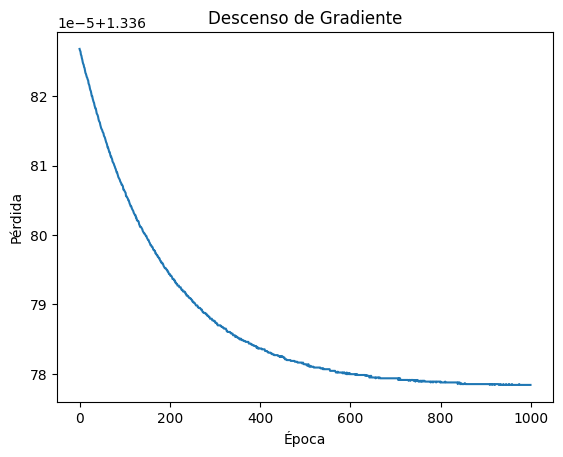

In [ ]:
import matplotlib.pyplot as plt

# Crear una lista de las pérdidas en cada época
loss_values = []

# Entrenamiento del modelo
for epoch in range(n_epochs):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b
        loss = tf.reduce_mean(tf.square(y_pred - y))

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    # Guardar el valor de la pérdida en cada época
    loss_values.append(loss.numpy())

# Crear el gráfico del descenso de gradiente
plt.plot(loss_values)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Descenso de Gradiente')
plt.show()
# descubrimos el numero de epocas necesarias

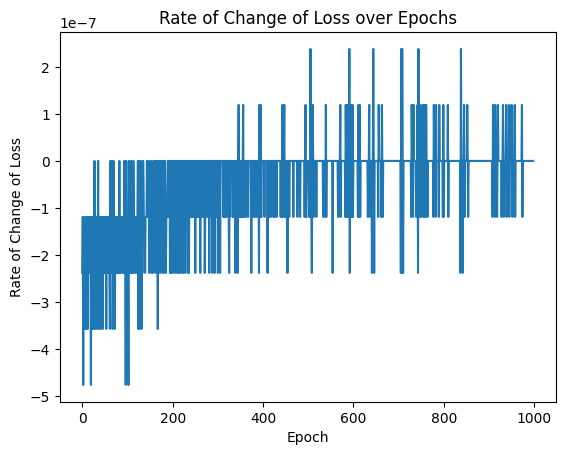

In [ ]:
import numpy as np

# Calculate the derivative of the loss_values
derivative = np.diff(loss_values)

# Plot the derivative
plt.plot(derivative)
plt.xlabel('Epoch')
plt.ylabel('Rate of Change of Loss')
plt.title('Rate of Change of Loss over Epochs')
plt.show()
